# Project 3
**Group 2** 
Ada Matilde Gige (adgi@itu.dk), Albert Schiffer (albsc@itu.dk), Andreas Frederik Flensted Olsen (frao@itu.dk), Timothy Beck (tibe@itu.dk) and Victor Popp Henriksen (vhen@itu.dk)


# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from PIL import Image 
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm


from os import walk #Used for getting all the filenames from a given directory !!!!!MAYBE NOT NECESSARY!!!!!
import glob #For finding specific file types

%run -i ../fyp2021p3_group00_functions.py

# Loading raw datafiles

In [3]:
#load all images of type .jpg
im_file_list2 = glob.glob("../data/example_image/*.jpg")
#load all maps of type .png
map_file_list2 = glob.glob("../data/example_segmentation/*.png")

#im_files = sorted(im_file_list2, key = uniq)
im_files = sorted(im_file_list2)
len(im_files)
print(im_files[0])

#map_files = sorted(map_file_list2, key = uniq)
map_files = sorted(map_file_list2)
len(map_files)         

# Loading the true file in
true = pd.read_csv('../data/example_ground_truth.csv')
# It is already sorted why it is not sorted as the others



../data/example_image/ISIC_0001769.jpg


## Loading the images into a list and making an ID dictionary
Taken from: https://stackoverflow.com/questions/33369832/read-multiple-images-on-a-folder-in-opencv-python/33371454

In [4]:
#Load in all .jpg files from the 'example_image' folder
images = [plt.imread(file) for file in im_files]
#Load in all .png files from the 'example_segmentation' folder
maps = [plt.imread(file) for file in map_files]

# Making a dictionary to find the id from the index
pic_id = dict()

for i in range(150):
    pic_id[i] = true['image_id'][i]
    

# Changing a normal image to luminace image
Making an image as the segmentation masks

In [8]:
def tolum(image):
    '''A function that takes a pictures filename, the picture must be two colored'''
    image = Image.open(image).convert('L')
    imagenp = np.asarray(image)
    return image , imagenp
    

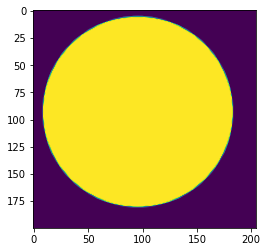

In [12]:
image , imagenp = tolum('circle.png')

plt.imshow(imagenp)

# Features

## Asymmetry

In [5]:
#A function that finds the center of a picture and meassures the assymmetri

def assymmetry(mapID):
    mask = maps[mapID]
    
    borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
    up, down, left, right = max(borders[0]), min(borders[0]), min(borders[1]), max(borders[1])
    center = ((left + right)//2, (up+down) //2) # Tuple with the coordinates for the center of the lesion
    
    difference = 0
    
    for i in range(18):
        borders = np.where(mask == 1) # This will return 2 arrays with the index where the pixels are ones
        left, right = min(borders[1]), max(borders[1])
        
        
        radiusdiff = (center[0]-left) - (right-center[0])
        difference += radiusdiff**2
        mask = transform.rotate(mask, 10, center = center)
    return difference/areas[mapID]
        

In [14]:
asymmetry = pd.read_csv("../data/features/assymmetry.csv", names = ['asymmetry'])

In [15]:
asymmetry

,asymmetry
0,0.082240
1,0.096948
2,0.007147
3,0.018892
4,0.154463
...,...
145,0.039940
146,0.682602
147,0.034185
148,0.006164


## Color segmentation

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries

In [4]:
'''This cell block loads in the images as imageobjects and resizes them. Afterwards they are being appended
to a list to store the new image objects'''

images = []
for file in im_files:
    im = Image.open(file)
    im = im.resize((800,500), resample=1) 
    images.append(im)
    

maps = []

for file in map_files:
    ma = Image.open(file)
    ma = ma.resize((800,500), resample=1)
    maps.append(ma)

In [14]:
def color_segmentation(list_of_images, list_of_corresponding_masks): #lists with resized and resampled images
    '''this function takes the 2 lists as input, the one list with images, and the other with its corresponding masks (both resized)
    For each masked image, it performs a felzensvalb algorithim, to compute the segmentation of the mole. The segmentation is 
    normalized (divided by the totalt number of pixels in the mole), and afterwards put into the dataframe as a feature.
    '''
    segmentation = {}
    
    for i in range(len(list_of_images)): #the file list
        img1 = list_of_images[i]
        print(img1)

        img2 = list_of_corresponding_masks[i]

        img2.paste(img1, (0,0), mask = img2) 

        segments_fz = felzenszwalb(img2, scale=8, sigma=1, min_size=10)

        number_of_segments = len(np.unique(segments_fz))

        normalized_segmentation = round(number_of_segments/(np.sum(list_of_corresponding_masks[i])),7)

        segmentation[i] = normalized_segmentation
    
    return segmentation

In [22]:
#call the function
#felz = color_segmentation(images, maps) 

''' Exported as a csv file to avoid future run time
'''

' Exported as a csv file to avoid future run time\n'

pixels in mask divided by area of mask =  0.0001335


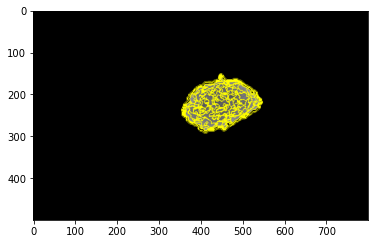

In [8]:
'''To see what is going on inside the loop, is a cutout for only 1 picture in this block of code

'''

img1 = images[0]
img2 = maps[0]
img2.paste(img1, (0,0), mask = img2) 
segments_fz = felzenszwalb(img2, scale=8, sigma=1, min_size=10)
number_of_segments = len(np.unique(segments_fz))
normalized_segmentation = round(number_of_segments/(np.sum(maps[0])),7)
plt.imshow(mark_boundaries(img2, segments_fz))
print('pixels in mask divided by area of mask = ', normalized_segmentation)
#segmenation[images[i]] = normalized_segmentation

In [20]:

np.savetxt("../data/features/segmentation.csv", list(felz.values()), delimiter=",")

## Border
### Area and perimiter

In [ ]:
# Finding the area and perimeter of all images. 

areas = []
peris = []
for i in maps:
    area, perimiter = measure_area_perimeter(i)
    areas.append(areas)
    peris.append(perimiter)
    
# Adding them to a file, so they don't have to be calculated each time

#np.savetxt("../data/features/perimeter.csv", peris, delimiter=",")
#np.savetxt("../data/features/area.csv", areas, delimiter=",")

In [6]:
areas = np.genfromtxt('../data/features/areas.csv', delimiter=',')
perimeter = np.genfromtxt('../data/features/perimeter.csv', delimiter=',')

### Area and perimeter scatterplot

In [27]:
def scatterplot(area, perimeter):
    # Define the size of the figure
    fig = plt.figure(figsize=(4, 3))
    # Set axes, that you want to work with:
    axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)
    # actually plot the data:
    axes.scatter(area, perimeter, label = 'Data', edgecolors='white')
    axes.set_title('Area and perimeter')
    axes.set_xlabel('Area')
    axes.set_ylabel('Perimeter')
    #axes.legend(loc='upper left'); axes.set_xlabel(data); axes.set_ylabel(data); axes.set_title('Scatter plot');
    return None

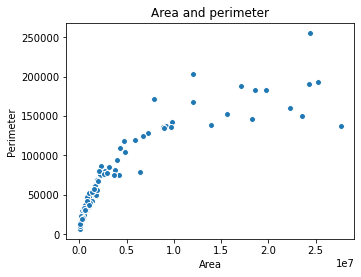

In [28]:
scatterplot(areas, perimeter)

## Perimeter divided by area

In [32]:
#making the perimiter divided by area feature

pa = []
for i in range(150): 
    pa.append(perimeter[i]/areas[i])
    
# Making a file with the perimeter divided by area feature
#np.savetxt("../data/features/perimeterdivarea.csv", areas, delimiter=",")


In [33]:
pa = np.genfromtxt('../data/features/perimeterdivarea.csv', delimiter=',')

### Making a histogram for the perimeter/area

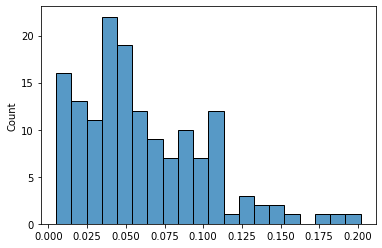

In [35]:
sns.histplot(pa, bins = 20)

# All features in one dataframe

In [21]:
true['unhealthy'] = 0

for i in range(150):
    if true['melanoma'][i] == 1 or true['seborrheic_keratosis'][i] == 1:
        true['unhealthy'][i] = 1

areas = pd.read_csv("../data/features/areas.csv", names = ['area'])
perimeter = pd.read_csv("../data/features/perimeter.csv", names = ['perimeter'])
pa = pd.read_csv('../data/features/perimeterdivarea.csv', names = ['peri/area'])
asymmetry = pd.read_csv("../data/features/assymmetry.csv", names = ['asymmetry'])
segmentation = pd.read_csv("../data/features/segmentation.csv", names = ['color segmentation/area'])

true['asymmetry'] = asymmetry
true['area'] = areas
true['perimeter'] = perimeter
true['peri/area'] = pa
true['color segmentation/area'] = segmentation
allfeatures = true
        
allfeatures

<ipython-input-21-b257ad3f381f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true['unhealthy'][i] = 1


,image_id,melanoma,seborrheic_keratosis,unhealthy,asymmetry,area,perimeter,peri/area,color segmentation/area
0,ISIC_0001769,0,0,0,0.082240,216160.0,20601.0,0.095304,0.000143
1,ISIC_0001852,0,0,0,0.096948,130493.0,14625.0,0.112075,0.000285
2,ISIC_0001871,0,0,0,0.007147,205116.0,18368.0,0.089549,0.000095
3,ISIC_0003462,0,0,0,0.018892,161705.0,14381.0,0.088934,0.000118
4,ISIC_0003539,0,0,0,0.154463,317040.0,21762.0,0.068641,0.000120
...,...,...,...,...,...,...,...,...,...
145,ISIC_0015443,0,0,0,0.039940,9732988.0,135731.0,0.013945,0.000113
146,ISIC_0015445,0,0,0,0.682602,12049938.0,202926.0,0.016840,0.000102
147,ISIC_0015483,0,0,0,0.034185,8856478.0,136170.0,0.015375,0.000127
148,ISIC_0015496,0,0,0,0.006164,8951522.0,135296.0,0.015114,0.000117


<AxesSubplot:>

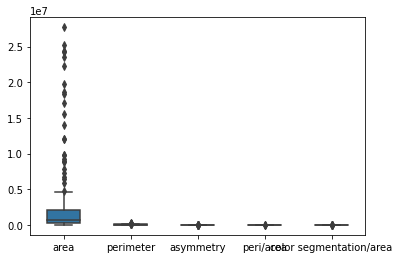

In [23]:
# Plotting the features

onlyfeatures = allfeatures[['area','perimeter', 'asymmetry', 'peri/area', 'color segmentation/area']]
sns.boxplot(data=onlyfeatures, width=0.5)

-3.315866100213801e-17
1.0


<AxesSubplot:>

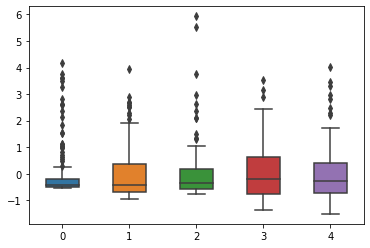

In [24]:
# Scaling the features

#Fit scaler on our data
scaler = preprocessing.StandardScaler().fit(onlyfeatures)

#Apply to data itself
normfeatures = scaler.transform(onlyfeatures)

print(normfeatures.mean()) #small number close to 0, round of error
print(normfeatures.var())  #equal to 1 
sns.boxplot(data=normfeatures, width=0.5,fliersize=5) #we see both negative and positive values, since the mean is 0


/home/andreas/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


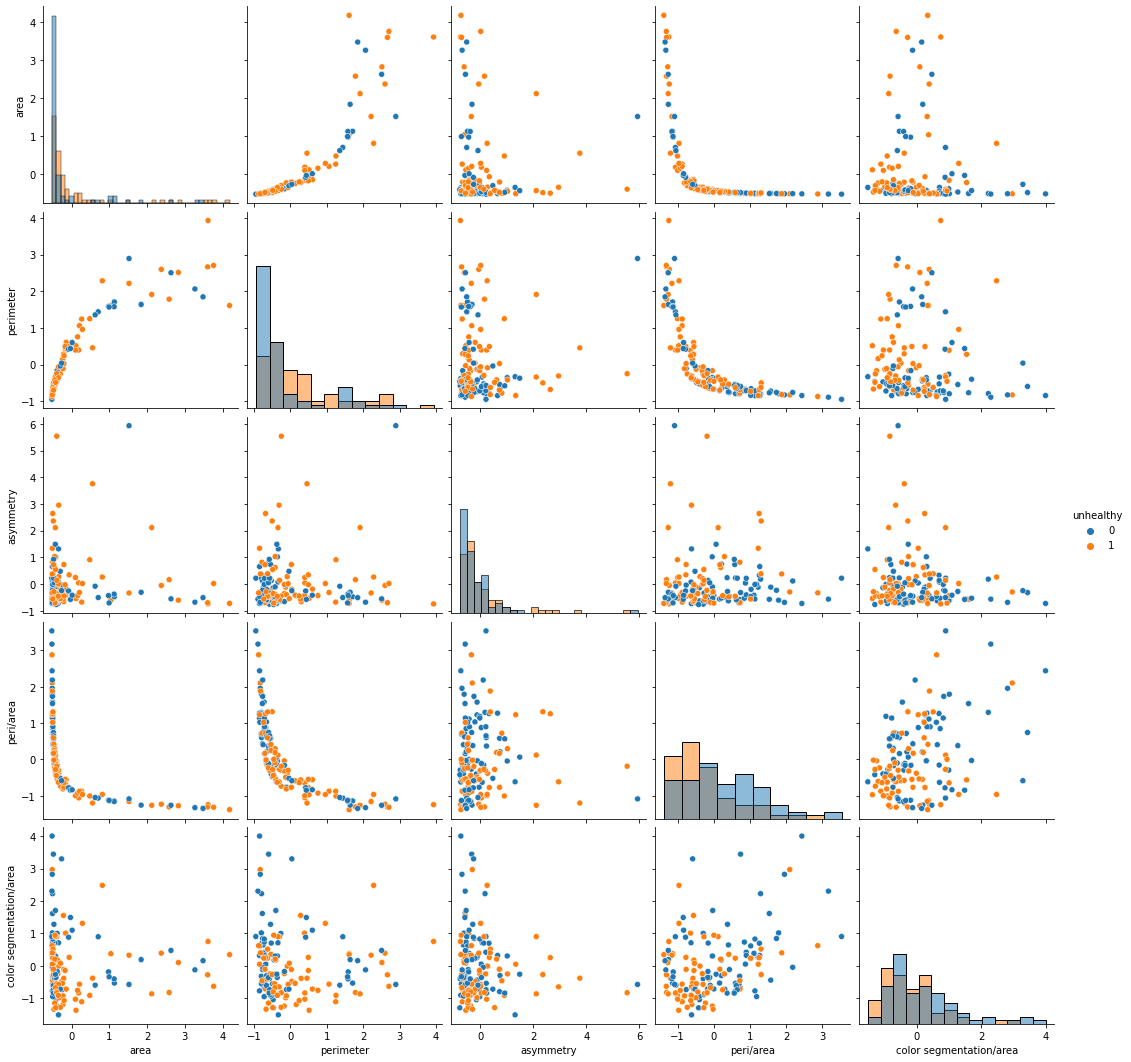

In [26]:
normfeatures = pd.DataFrame(normfeatures, columns = ['area','perimeter', 'asymmetry', 'peri/area', 'color segmentation/area'])

# Look at values per class
normfeatures['unhealthy'] = allfeatures['unhealthy']



sns.pairplot(normfeatures, hue="unhealthy", size=3,diag_kind="hist")

In [28]:
# Split the data before feature selection
from sklearn.model_selection import train_test_split

# Some noisy data not correlated
noise = np.random.RandomState(42).uniform(0, 0.1, size=(normfeatures.shape[0], 20))

# Add the noisy data to the informative features
X = np.hstack((normfeatures[['area', 'perimeter','asymmetry', 'peri/area', 'color segmentation/area']], noise))
y = normfeatures['unhealthy']

# Split dataset to select feature and evaluate the classifier
X_dev, X_test, y_dev, y_test = train_test_split(
        X, y, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(
        X_dev, y_dev, stratify=y_dev)

In [29]:
# Univariate feature selection with mutual information for feature scoring
selector = SelectKBest(mutual_info_classif, k=4)
selector.fit(X_train, y_train)

scores = selector.scores_


In [30]:
# Select features that had good scores on training set
X_train1 = X_train[:, [0,3]]
X_train2 = selector.transform(X_train)

# Train a classifier
knn1 = KNeighborsClassifier(n_neighbors=1) # other hyperparameters possible
knn1trained = knn1.fit(X_train2, y_train)

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2trained = knn2.fit(X_train2, y_train)

tree1 = DecisionTreeClassifier() # various hyperparameters
tree1trained = tree1.fit(X_train2, y_train)

svm1 = svm.SVC()
svmtrained = svm1.fit(X_train2, y_train)

In [19]:
#Select the same features as before
X_val1 = X_val[:, [0,3]]
X_val2 = selector.transform(X_val)

y_val_knn1 = knn1trained.predict(X_val2)
y_val_knn2 = knn2trained.predict(X_val2)
y_val_svm1 = svmtrained.predict(X_val2)
y_val_tree = tree1trained.predict(X_val2)

# Simple accuracy
print(np.sum(y_val_knn1 == y_val) / np.size(y_val) * 100)
print(np.sum(y_val_knn2 == y_val) / np.size(y_val) * 100)
print(np.sum(y_val_svm1 == y_val) / np.size(y_val) * 100)
print(np.sum(y_val_tree == y_val) / np.size(y_val) * 100)

67.85714285714286
78.57142857142857
67.85714285714286
75.0
